# The Poisson Problem
$$\begin{align*}
-\nabla\cdot(A\cdot\nabla u) &= -cu + f\label{eq:general_poisson}\tag{1}\\
x\in\Omega & \subset\mathbb{R}^n\:(n=1,2,3)\\
A(x) & \in \mathbb{R}^n\\
c(x) & \in \mathbb{R}^n\\
f(x) & \in \mathbb{R}^n \\
u: \Omega & \to\mathbb{R}\end{align*}$$ We will consider three types of boundary conditions on $\partial\Omega$. 

**Dirichlet boundary conditions** are $u(x) = g_D(x)$, prescribed on some portion of the boundary.  **Von Neumann bounday conditions** are $\vec{n}\cdot\nabla u = g_N(x)$, prescribed on some portion of the boundary $\Gamma_N$. **Robin/Robinson boundary conditions** are $\vec{n}\cdot\nabla u + h(x)u(x) = g_R(x)$, prescribed on $\Gamma_R$.

## "Toy" Poisson Problem

If $A(x)=-I$, the Poission problem ($\ref{eq:general_poisson}$) reduces to: $$\begin{align*}-\nabla\cdot\nabla u = 0\label{eq:toy_poisson}\tag{2}\end{align*}$$


---

# Finite Difference Methods

If $\Omega\subset\mathbb{R}^n$, the toy problem ($\ref{eq:toy_poisson}$) can be expressed with Dirichlet boundary conditions as $$\begin{align*}-\Delta u &= f \text{ in }\Omega\\u(x) &= g(x) \text{ on }\partial\Omega\end{align*}$$

The goal of finite difference methods is to approximate the solution $u(x)$ with a point-wise discretization $\tilde{u}(x_i)$. We can do this by using the definition of a derivative $$\frac{du}{dx} = \lim_{h\to 0}\frac{u(x+h)-u(x-h)}{h}$$ and obtaining an approxmiation for $\frac{du}{dx}$ by fixing $h<1$ to be some small value. We can repeat the process and obtain an approximation for $\frac{d^2u}{dx^2}$:
<a id="FDM_key_idea"></a>
<div class="alert alert-block alert-success" style="color:black">  
    For $x\in\mathbb{R}$, $u\in C^4([x-h, x+h])$, and $h\lt 1$,$$\begin{gather*}\delta^2_hu = \frac{u(x+h)-2u(x)+u(x-h)}{h^2}\\\frac{d^2u}{dx^2} = \delta^2_hu + Ch^2 \text{ for some } C\leq\frac{1}{12}\|\frac{d^4u}{dx^4}\|_\infty\end{gather*}$$  
</div>
This process can be applied in multiple dimensions at once to discretize $\Delta = \partial^2_x + \partial^2_y$.

---
## Example: FDM in 1D
We will solve the toy poisson problem with $\Omega=[0,1]\subset\mathbb{R}$ and $g(x) = 0$, $f(x) = 1$ both analytically and numerically.

Analytically solving $-u''(x) = \;\; u(0)=u(1)=0$ is simple enough via direct integration: $$u(x) = \frac{-x^2}{2} + \frac{x}{2}$$

Numerically, we can use a finite difference scheme to "chop up" $\Omega$ into small, equally-sized intervals of width $h$, and then use $\delta^2_h$ to find a solution.

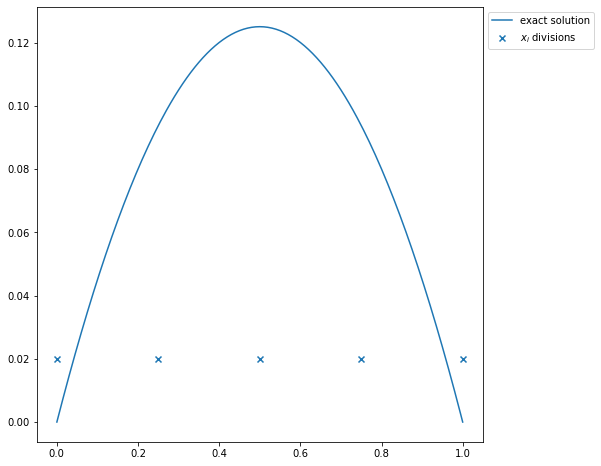

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc("figure", figsize=(8,8))
import numpy as np
N = 4 # the number of intervals to cut [0,1] into
x_i = np.linspace(0,1,N+1) # cut [0,1] into N equally sized intervals
h = 1/N
u_exact = lambda t: -0.5*t**2 + 0.5*t # note down the exact solution

fig, ax = plt.subplots()
# plot the exact solution
ax.plot((x := np.linspace(0,1,201)),u_exact(x),label="exact solution")
# plot the divisions
ax.scatter(x_i, [0.02]*x_i.shape[0],label="$x_i$ divisions",marker='x')
_ = ax.legend(bbox_to_anchor=(1,1),loc='upper left') 

Since we have already divided $\Omega$ into $N$ intervals $[x_i,x_{i+1}]$ of width $h=\frac{1}{N}$, we can use the defiintion [$\delta^2_h$](#FDM_key_idea) to obtain the following: $$\begin{align*} \delta^2_h u(x_i) &= \frac{u(x_{i-1})-2u(x_i)+u(x_{i+1})}{h^2}\\&= 1\end{align*}$$ This generates N linear equations, where $$h^2\begin{pmatrix}1&-2&1\end{pmatrix}\cdot\begin{pmatrix}u(x_{i-1})\\u(x_i)\\u(x_{i+1})\end{pmatrix} = 1$$ for each $u(x_i)$ We can write this system in a concise matrix form $$\frac{1}{h^2} A u(x_i)=f(x_i)$$
Since $u(x_0) = u(x_N) = 0$, this system of equations is solveable for each $u(x_i)$.

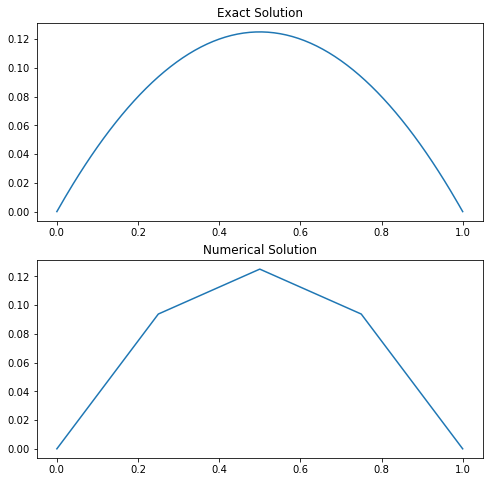

In [4]:
# Generate the RHS matrix
A = np.eye(N+1,k=-1)-2*np.eye(N+1)+np.eye(N+1,k=1)
# Scale by 1/(h**2) to set up the system
A *= 1/(h**2)
b = -1*np.ones((N+1,1)) # Set up the "forcing vector" in the system Au=b

# now we apply the boundary conditions to set u(0) and u(1)
b[(0,N),0] = 0
A[(0,N),:] = 0
A[0,0] = 1
A[N,N] = 1

# and solve the system using gaussian elimination!
u_appx = np.linalg.solve(A,b)
fig, axs = plt.subplots(2,1)
axs[0].set_title("Exact Solution")
axs[0].plot(x,u_exact(x))
axs[1].set_title("Numerical Solution")
_ = axs[1].plot(x_i,u_appx)